# Packages

In [ ]:
!pip install asyncpraw nest_asyncio nltk
import asyncpraw
import nest_asyncio
import asyncio
import json
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import pandas as pd




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Sentiment Analysis of r/Monzo

In [ ]:
# Apply the nest_asyncio patch
nest_asyncio.apply()

In [ ]:
async def fetch_subreddit_posts():

    # Your Reddit API credentials
    client_id = 'pK_ApJXmzNd0BgM09iEIyg'
    client_secret = 'b3Y94aYfiRUTSbgRid9V7Aca5x_rjQ'
    user_agent = 'MyMonzoApp/0.1 by Mental-Claim483'

    # Initialize Async PRAW with your credentials
    reddit = asyncpraw.Reddit(
        client_id=client_id,
        client_secret=client_secret,
        user_agent=user_agent
    )

    subreddit = await reddit.subreddit('Monzo')

    # Fetch the top 10 posts of all time, to check I have accessed the subreddit.
    async for post in subreddit.top(limit=10, time_filter='all'):
        print(post.title)

# Running the async function
await fetch_subreddit_posts()

Monzo closed my account out of nowhere. I’m freaking out.
I have never used OnlyFans in my life, woke up this morning to this :/ luckily I keep the majority of my money in a separate pot... This sucks ass
Would you like to see something like this on Monzo? Personally I think it’s a great idea
“We’re closing your Monzo account in March”
‘Trendy’ Monzo now feels like a children’s bank – I’m leaving for Barclays
Avoided a fraudster tonight.
first time i’ve encountered this screen, must be a tough month for us all 🥲
Trump isn't orange, he's hot coral.
Schrödinger’s credit score
Thanks for the reminder Monzo


In [ ]:

async def fetch_top_posts_all_time(limit=1000):
    client_id = 'pK_ApJXmzNd0BgM09iEIyg'
    client_secret = 'b3Y94aYfiRUTSbgRid9V7Aca5x_rjQ'
    user_agent = 'MyMonzoApp/0.1 by Mental-Claim483t'

    # Initialise Async PRAW
    reddit = asyncpraw.Reddit(
        client_id=client_id,
        client_secret=client_secret,
        user_agent=user_agent
    )

    # Accessing a subreddit
    subreddit = await reddit.subreddit('Monzo')

    # Fetch the top posts of all time
    posts = []
    async for post in subreddit.top(limit=limit, time_filter='all'):
        posts.append({
            'title': post.title,
            'score': post.score,
            'id': post.id,
            'url': post.url,
            'comms_num': post.num_comments,
            'created': post.created,
            'body': post.selftext
        })

    # Save the posts to a JSON file
    with open('top_posts_monzo.json', 'w') as f:
        json.dump(posts, f, indent=4)

    print(f'Saved {len(posts)} posts to top_posts_monzo.json')

# Running the async function
await fetch_top_posts_all_time()

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7bb2423f72e0>
ERROR:asyncio:Unclosed connector
connections: ['[(<aiohttp.client_proto.ResponseHandler object at 0x7bb2423fb3a0>, 165.107100546)]']
connector: <aiohttp.connector.TCPConnector object at 0x7bb2423f7370>


Saved 1000 posts to top_posts_monzo.json


In [ ]:
# Download the required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load the saved posts from the JSON file
with open('top_posts_monzo.json', 'r') as f:
    posts = json.load(f)

# Tokenize the post bodies
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

for post in posts:
    post['tokens'] = preprocess(post['body'])

# Print tokens of the first post
print(posts[0]['tokens'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['made', 'previous', 'post', 'transfer', 'money', 'hsbc', 'account', 'contacted', 'help', 'number', 'times', 'resolve', 'issue', 'even', 'emailed', 'screenshots', 'someone', 'contacted', 'previous', 'post', 'monzo', 'email', 'address', 'got', 'notification', 'entire', 'account', 'closed', 'warning', 'freaking', 'says', 'process', 'transfer', 'weeks', 'majority', 'money', 'tell', 'reason', 'done', 'anything', 'criminal', 'using', 'years', 'without', 'issue', 'mean', 'monzo', 'account']


In [ ]:
# Combine all tokens from all posts
all_tokens = [token for post in posts for token in post['tokens']]

# Calculate frequency distribution
freq_dist = FreqDist(all_tokens)

# Display the 10 most common words
print(freq_dist.most_common(10))

[('monzo', 929), ('account', 503), ('card', 317), ('money', 275), ('would', 229), ('get', 221), ('anyone', 198), ('like', 197), ('bank', 193), ('one', 177)]


In [ ]:
# Initialize VADER sentiment analyser
sia = SentimentIntensityAnalyzer()

# Analyse sentiment of each post
for post in posts:
    sentiment = sia.polarity_scores(post['body'])
    post['sentiment'] = sentiment

# Example: print sentiment scores of the first post
print(posts[0]['sentiment'])

{'neg': 0.128, 'neu': 0.817, 'pos': 0.054, 'compound': -0.8917}


In [ ]:
import json
import pandas as pd

# Load the saved posts from the JSON file
with open('top_posts_monzo.json', 'r') as f:
    monzo_posts = json.load(f)

# Convert to DataFrame
monzo_df = pd.DataFrame(monzo_posts)


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment of each post
for post in monzo_posts:
    sentiment = sia.polarity_scores(post['body'])
    post['sentiment'] = sentiment

# Convert to DataFrame again to include sentiment analysis
monzo_df = pd.DataFrame(monzo_posts)


r/Monzo Sentiment Distribution (Counts):
sentiment_category
positive    430
neutral     377
negative    193
Name: count, dtype: int64


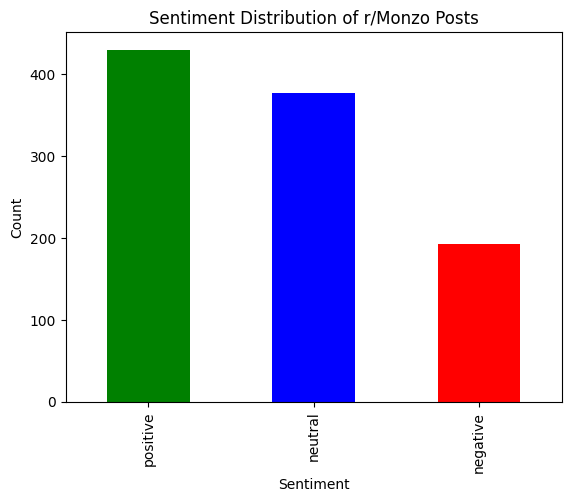

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the saved posts from the JSON file for r/Monzo
with open('top_posts_monzo.json', 'r') as f:
    monzo_posts = json.load(f)

# Convert to DataFrame
monzo_df = pd.DataFrame(monzo_posts)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment of each post
for post in monzo_posts:
    sentiment = sia.polarity_scores(post['body'])
    post['sentiment'] = sentiment

# Convert to DataFrame again to include sentiment analysis
monzo_df = pd.DataFrame(monzo_posts)

# Extract compound sentiment scores into a new column
monzo_df['compound'] = monzo_df['sentiment'].apply(lambda x: x['compound'] if isinstance(x, dict) else None)

# Categorize the sentiment based on the compound score
monzo_df['sentiment_category'] = monzo_df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Calculate the count of sentiment categories for r/Monzo
monzo_sentiment_count = monzo_df['sentiment_category'].value_counts()

# Print the sentiment distribution for verification
print("r/Monzo Sentiment Distribution (Counts):")
print(monzo_sentiment_count)

# Plot the sentiment count for r/Monzo
monzo_sentiment_count.plot(kind='bar', color=['green', 'blue', 'red'])

# Add title and labels
plt.title('Sentiment Distribution of r/Monzo Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()


Out of 1000 posts less than half are positive.

# Time-Series Analysis of r/Monzo

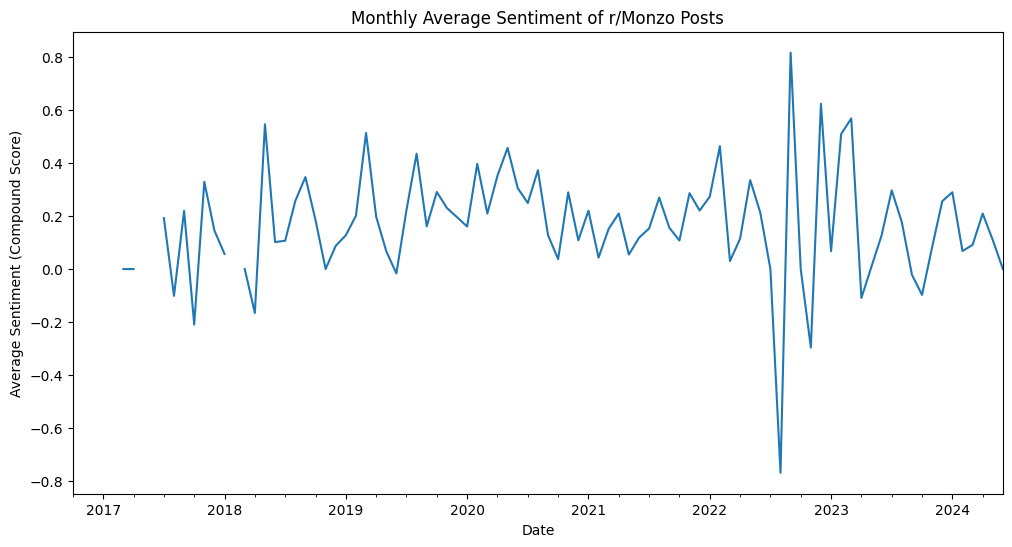

In [ ]:
# Convert 'created' field to datetime
monzo_df['created'] = pd.to_datetime(monzo_df['created'], unit='s')

# Extract compound sentiment scores into a new column
monzo_df['compound'] = monzo_df['sentiment'].apply(lambda x: x['compound'])

# Group by month and calculate the mean compound sentiment
monthly_sentiment = monzo_df.resample('M', on='created')['compound'].mean()

# Plot the time series
plt.figure(figsize=(12, 6))
monthly_sentiment.plot()
plt.title('Monthly Average Sentiment of r/Monzo Posts')
plt.xlabel('Date')
plt.ylabel('Average Sentiment (Compound Score)')
plt.show()

In this graph which shows the sentiment of posts from 2017-2024, we can see that the sentiment fluctuates over time, showing a mix of positive, neutral, and negative sentiments.
There is no clear long-term trend indicating a steady increase or decrease in sentiment, suggesting that user opinions about Monzo vary significantly month-to-month.

# Sentiment Analysis of r/UKPersonalFinance

In [ ]:
async def fetch_subreddit_posts():

    # Your Reddit API credentials
    client_id = 'pK_ApJXmzNd0BgM09iEIyg'
    client_secret = 'b3Y94aYfiRUTSbgRid9V7Aca5x_rjQ'
    user_agent = 'MyMonzoApp/0.1 by Mental-Claim483'

    # Initialize Async PRAW with your credentials
    reddit = asyncpraw.Reddit(
        client_id=client_id,
        client_secret=client_secret,
        user_agent=user_agent
    )

    subreddit = await reddit.subreddit('UKPersonalFinance')

    # Fetch the top 10 posts of all time, to check I have accessed the subreddit.
    async for post in subreddit.top(limit=10, time_filter='all'):
        print(post.title)

# Running the async function
await fetch_subreddit_posts()

Asda has announced it is offering over 60’s unlimited hot drinks, hot soup and a roll for just £1 through November and December.
I just paid off the last part of my debt!
Ways to supplement your income here in the UK
Financial Reality Check
Debt free as of today (almost)
For those of you who are in your 30s earning 24k does this sub make you feel like a failure as everyone on here seems to be rich ?
Finally paid off my debt and I'm so proud of myself
A warning about a kinda clever bank scam
Does anyone else think Amazon is increasingly becoming less value for money?
Sold a game on Steam. Taxes and other fees are utterly brutal.


In [ ]:
import asyncpraw
import nest_asyncio
import asyncio
import json

# Apply the nest_asyncio patch
nest_asyncio.apply()

async def fetch_top_posts_all_time(limit=1000):
    # Your Reddit API credentials
    client_id = 'pK_ApJXmzNd0BgM09iEIyg'
    client_secret = 'b3Y94aYfiRUTSbgRid9V7Aca5x_rjQ'
    user_agent = 'MyMonzoApp/0.1 by Mental-Claim483'

    # Initialize Async PRAW with your credentials
    reddit = asyncpraw.Reddit(
        client_id=client_id,
        client_secret=client_secret,
        user_agent=user_agent
    )

    # Accessing a subreddit
    subreddit = await reddit.subreddit('UKPersonalFinance')

    # Fetch the top posts of all time
    posts = []
    async for post in subreddit.top(limit=limit, time_filter='all'):
        posts.append({
            'title': post.title,
            'score': post.score,
            'id': post.id,
            'url': post.url,
            'comms_num': post.num_comments,
            'created': post.created,
            'body': post.selftext
        })

    # Save the posts to a JSON file
    with open('top_posts_ukpf.json', 'w') as f:
        json.dump(posts, f, indent=4)

    print(f'Saved {len(posts)} posts to top_posts_ukpf.json')

# Running the async function
await fetch_top_posts_all_time()



ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7bb23c3021d0>
ERROR:asyncio:Unclosed connector
connections: ['[(<aiohttp.client_proto.ResponseHandler object at 0x7bb23c228940>, 1037.39763861)]']
connector: <aiohttp.connector.TCPConnector object at 0x7bb23c303ac0>


Saved 997 posts to top_posts_ukpf.json


In [ ]:
# Load the saved posts from the JSON file
with open('top_posts_ukpf.json', 'r') as f:
    posts = json.load(f)

# Tokenize the post bodies
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

for post in posts:
    post['tokens'] = preprocess(post['body'])

# Print tokens of the first post
print(posts[0]['tokens'])

['asda', 'announced', 'cafe', 'offering', 'roll', 'hot', 'soup', 'hot', 'drinks', 'november', 'december', 'help', 'cost', 'living', 'crisis', 'strictly', 'personal', 'finance', 'related', 'sure', 'plenty', 'people', 'age', 'family', 'age', 'may', 'see', 'post', 'benefit', 'though', 'worth', 'posting', 'awareness']


In [ ]:
# Combine all tokens from all posts
all_tokens = [token for post in posts for token in post['tokens']]

# Calculate frequency distribution
freq_dist = FreqDist(all_tokens)

# Display the 10 most common words
print(freq_dist.most_common(10))

[('get', 803), ('money', 772), ('would', 710), ('year', 592), ('month', 576), ('pay', 571), ('people', 562), ('https', 561), ('time', 558), ('like', 553)]


In [ ]:
# Initialize VADER sentiment analyser
sia = SentimentIntensityAnalyzer()

# Analyse sentiment of each post
for post in posts:
    sentiment = sia.polarity_scores(post['body'])
    post['sentiment'] = sentiment

# Example: print sentiment scores of the first post
print(posts[0]['sentiment'])

{'neg': 0.031, 'neu': 0.832, 'pos': 0.136, 'compound': 0.8225}


UKPersonalFinance Sentiment Distribution (Counts):
sentiment_category
positive    758
negative    209
neutral      30
Name: count, dtype: int64


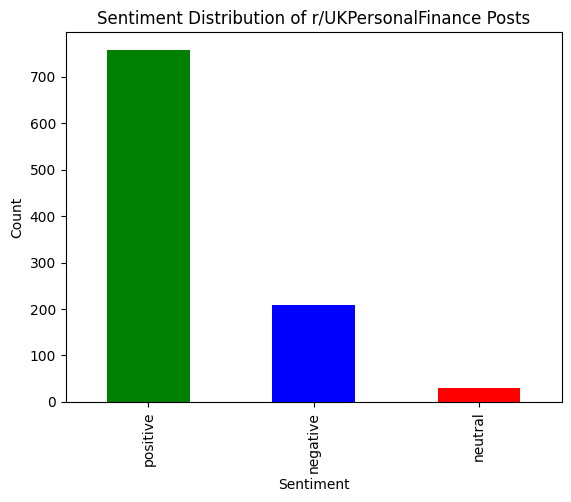

In [ ]:
# Load the saved posts from the JSON file
with open('top_posts_ukpf.json', 'r') as f:
    ukpf_posts = json.load(f)

# Convert to DataFrame
ukpf_df = pd.DataFrame(ukpf_posts)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment of each post
for post in ukpf_posts:
    sentiment = sia.polarity_scores(post['body'])
    post['sentiment'] = sentiment

# Convert to DataFrame again to include sentiment analysis
ukpf_df = pd.DataFrame(ukpf_posts)

# Extract compound sentiment scores into a new column
ukpf_df['compound'] = ukpf_df['sentiment'].apply(lambda x: x['compound'] if isinstance(x, dict) else None)

# Categorize the sentiment based on the compound score
ukpf_df['sentiment_category'] = ukpf_df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Calculate the count of sentiment categories for r/UKPersonalFinance
ukpf_sentiment_count = ukpf_df['sentiment_category'].value_counts()

# Print the sentiment distribution for verification
print("UKPersonalFinance Sentiment Distribution (Counts):")
print(ukpf_sentiment_count)

# Plot the sentiment count for r/UKPersonalFinance
ukpf_sentiment_count.plot(kind='bar', color=['green', 'blue', 'red'])

# Add title and labels
plt.title('Sentiment Distribution of r/UKPersonalFinance Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()


# Time Series of r/UKPersonalFinance

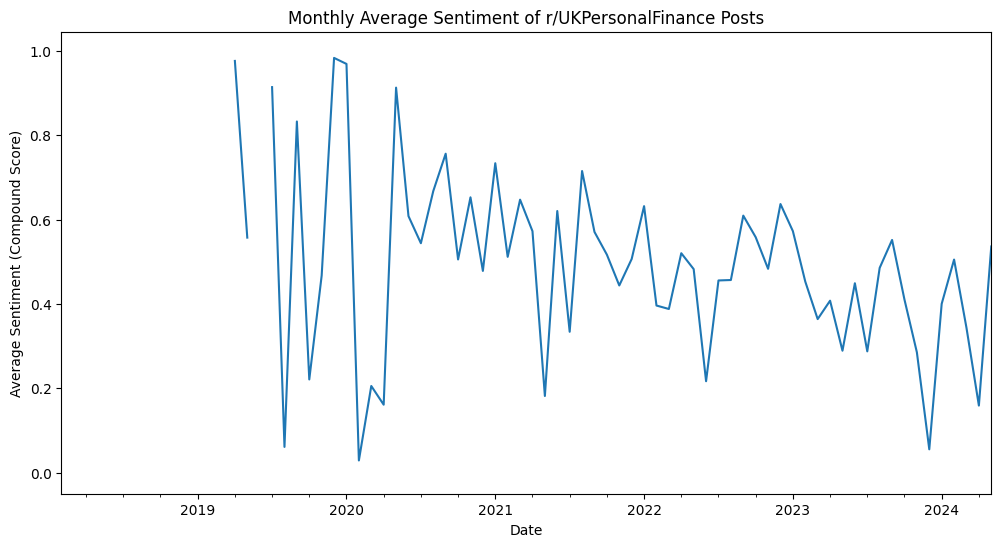

In [ ]:
# Step 1: Install the VADER sentiment analysis library
!pip install vaderSentiment

# Step 2: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json

# Step 3: Load the saved posts from the JSON file
with open('top_posts_ukpf.json', 'r') as f:
    ukpf_posts = json.load(f)

# Step 4: Convert to DataFrame
ukpf_df = pd.DataFrame(ukpf_posts)

# Step 5: Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Step 6: Analyze sentiment of each post
ukpf_df['sentiment'] = ukpf_df['body'].apply(lambda body: sia.polarity_scores(body))

# Step 7: Convert 'created' field to datetime
ukpf_df['created'] = pd.to_datetime(ukpf_df['created'], unit='s')

# Step 8: Extract compound sentiment scores into a new column
ukpf_df['compound'] = ukpf_df['sentiment'].apply(lambda x: x['compound'])

# Step 9: Group by month and calculate the mean compound sentiment
monthly_sentiment = ukpf_df.resample('M', on='created')['compound'].mean()

# Step 10: Plot the time series
plt.figure(figsize=(12, 6))
monthly_sentiment.plot()
plt.title('Monthly Average Sentiment of r/UKPersonalFinance Posts')
plt.xlabel('Date')
plt.ylabel('Average Sentiment (Compound Score)')
plt.show()

# Comparative Sentiment Analysis

In [ ]:
import json
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the saved posts from the JSON file for r/Monzo
with open('top_posts_monzo.json', 'r') as f:
    monzo_posts = json.load(f)

# Load the saved posts from the JSON file for r/UKPersonalFinance
with open('top_posts_ukpf.json', 'r') as f:
    ukpf_posts = json.load(f)

# Convert to DataFrames
monzo_df = pd.DataFrame(monzo_posts)
ukpf_df = pd.DataFrame(ukpf_posts)


In [ ]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment of each post in r/Monzo
for post in monzo_posts:
    sentiment = sia.polarity_scores(post['body'])
    post['sentiment'] = sentiment

# Analyze sentiment of each post in r/UKPersonalFinance
for post in ukpf_posts:
    sentiment = sia.polarity_scores(post['body'])
    post['sentiment'] = sentiment

# Convert to DataFrames again to include sentiment analysis
monzo_df = pd.DataFrame(monzo_posts)
ukpf_df = pd.DataFrame(ukpf_posts)

# Extract compound sentiment scores into new columns
monzo_df['compound'] = monzo_df['sentiment'].apply(lambda x: x['compound'] if isinstance(x, dict) else None)
ukpf_df['compound'] = ukpf_df['sentiment'].apply(lambda x: x['compound'] if isinstance(x, dict) else None)

# Categorize the sentiment based on the compound score
monzo_df['sentiment_category'] = monzo_df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
ukpf_df['sentiment_category'] = ukpf_df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))



In [ ]:
# Normalize the counts to be out of 1000
monzo_sentiment_count = (monzo_df['sentiment_category'].value_counts() / len(monzo_df)) * 1000
ukpf_sentiment_count = (ukpf_df['sentiment_category'].value_counts() / len(ukpf_df)) * 1000

# Print the sentiment distribution for verification
print("r/Monzo Sentiment Distribution (Counts):")
print(monzo_sentiment_count)
print("\nr/UKPersonalFinance Sentiment Distribution (Counts):")
print(ukpf_sentiment_count)



r/Monzo Sentiment Distribution (Counts):
sentiment_category
positive    432.0
neutral     374.0
negative    194.0
Name: count, dtype: float64

r/UKPersonalFinance Sentiment Distribution (Counts):
sentiment_category
positive    761.283852
negative    208.625878
neutral      30.090271
Name: count, dtype: float64


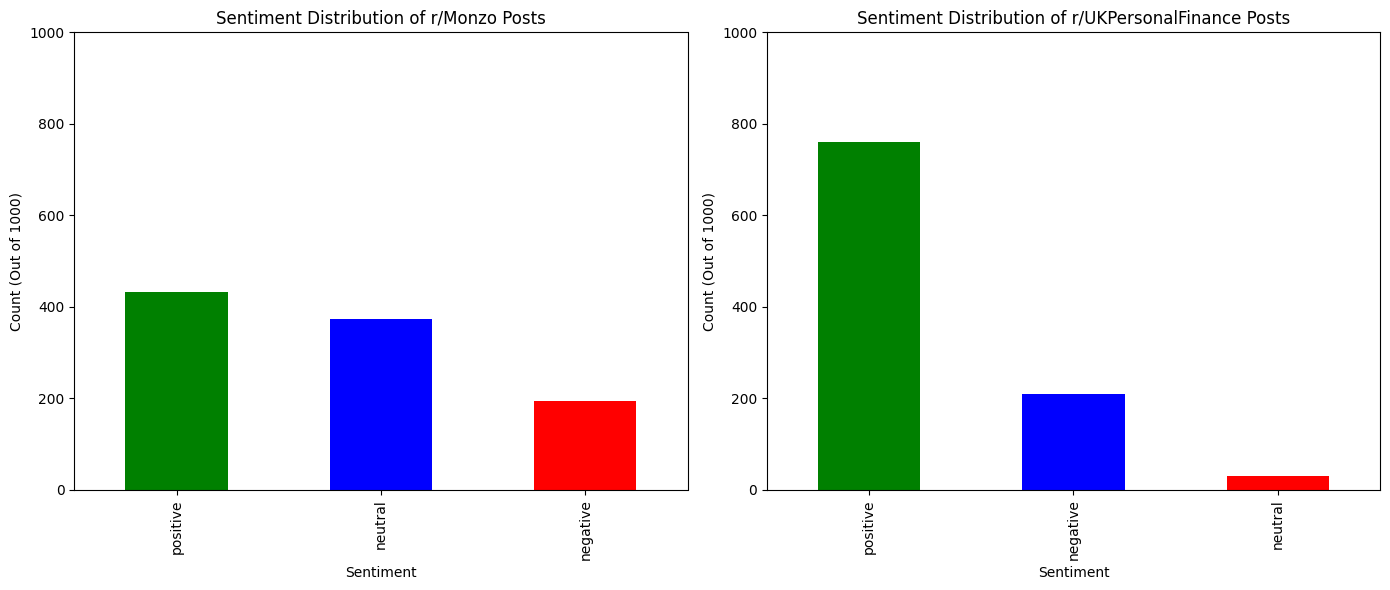

In [ ]:
import matplotlib.pyplot as plt

# Plot the sentiment count for r/Monzo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
monzo_sentiment_count.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution of r/Monzo Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count (Out of 1000)')
plt.ylim(0, 1000)

# Plot the sentiment count for r/UKPersonalFinance
plt.subplot(1, 2, 2)
ukpf_sentiment_count.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution of r/UKPersonalFinance Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count (Out of 1000)')
plt.ylim(0, 1000)

# Display the plots
plt.tight_layout()
plt.show()



> I don't think it makes sense to analyse the two subreddits individually as well as comparatively. Maybe I can do topic modelling of the two subreddits? Or another Natural Langaue Processing technique?  

